In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import mpl_toolkits

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})

In [2]:
# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [3]:
data = pd.read_csv("data_toidp_10062019_p1.csv")

In [4]:
data.head()

,CUSTOMER_CDE,SUB_BRANCH_CDE,NII_DEPOSIT_MTH,CUSTOMER_CDE_1,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,CUSTOMER_STATUS_CDE,GENDER_CDE,PROVINCE_CDE,MARITAL_STATUS,...,SUB_BRANCH_CDE_1,CATEGORY_CDE,PRODUCT_CDE,INTEREST_RATE,RATE_FTP,DAO_CDE,SUB_TERM_ID,CURRENCY_CDE,ACCT_GRP_DEPOSIT,ACTUAL_BAL_LCL
0,10000001,VN0012937,23333.33335,10000001,1571,2001,1001,MALE,5000.0,MARRIED,...,VN0012937,8100,10001,6.8,7.40,26347,12M,VND,130,50000000.0
1,10000003,VN0012186,11960.00000,10000003,7311,2001,1001,MALE,3600.0,MARRIED,...,VN0012186,8100,10044,5.0,5.50,29169,1M,VND,130,0.0
2,10000011,VN0011346,29027.00000,10000011,4231,2001,1001,FEMALE,5000.0,MARRIED,...,VN0011346,8100,10001,0.0,1.75,23615,1M,USD,130,20008800.0
3,10000019,VN0011675,115000.00000,10000019,424,1001,1001,FEMALE,5000.0,MARRIED,...,VN0011675,8100,10044,5.3,6.45,34729,3M,VND,130,120000000.0
4,10000022,VN0012933,10366.32293,10000022,7311,2001,1001,MALE,5000.0,SINGLE,...,VN0012933,1001,11032,0.3,5.50,17099,NonTerm,VND,100,4882522.0


In [5]:
x=data

g = x.groupby('SUB_TERM_ID')

g.groups.keys()

dict_keys(['100M', '105M', '108M', '10M', '110M', '117M', '118M', '11M', '120M', '12M', '13M', '14M', '15M', '16M', '18M', '1M', '1W', '20M', '21M', '22M', '23M', '24M', '25M', '26M', '27M', '28M', '2M', '2W', '33M', '34M', '35M', '36M', '3M', '3W', '43M', '44M', '46M', '47M', '48M', '49M', '4M', '51M', '59M', '5M', '60M', '62M', '6M', '70M', '72M', '7M', '82M', '84M', '8M', '96M', '99M', '9M', '>10Y', 'NonTerm'])

In [6]:
di = {'100M':'100', '105M':'105', '108M':'108', '10M':'10', '110M':'110', '117M':'117', '118M':'118', '11M':'11', '120M':'120', '12M':'12', '13M':'13', '14M':'14', '15M':'15', '16M':'16', '18M':'18', 
      '1M':'1', '1W':'0.25', '20M':'20', '21M':'21', '22M':'22', '23M':'23', '24M':'24', '25M':'25', '26M':'26', '27M':'27', '28M':'28', '2M':'2', '2W':'0.5', '33M':'33', '34M':'34', '35M':'35', '36M':'36', 
      '3M':'3', '3W':'0.75', '43M':'43', '44M':'44', '46M':'46', '47M':'47', '48M':'48', '49M':'49', '4M':'4', '51M':'51', '59M':'59', '5M':'5', '60M':'60', '62M':'62', '6M':'6', '70M':'70', '72M':'72', 
      '7M':'7', '82M':'82', '84M':'84', '8M':'8', '96M':'96', '99M':'99', '9M':'9', '>10Y':'122', 'NonTerm':'0'}
data2 = data
#data2.replace({"SUB_TERM_ID": di})
data2['SUB_TERM_ID'].replace(di, inplace=True)

#data2['SUB_TERM_ID'].head()
#data2.groupby('SUB_TERM_ID').sum()

In [7]:
x=data2

g = x.groupby('SUB_TERM_ID')

g.groups.keys()

dict_keys(['0', '0.25', '0.5', '0.75', '1', '10', '100', '105', '108', '11', '110', '117', '118', '12', '120', '122', '13', '14', '15', '16', '18', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '3', '33', '34', '35', '36', '4', '43', '44', '46', '47', '48', '49', '5', '51', '59', '6', '60', '62', '7', '70', '72', '8', '82', '84', '9', '96', '99'])

In [8]:
data2['SUB_BRANCH_CDE'] = data2['SUB_BRANCH_CDE'].str.replace('VN00','')
#data2.groupby('SUB_BRANCH_CDE').sum()

In [9]:
data2.head()

,CUSTOMER_CDE,SUB_BRANCH_CDE,NII_DEPOSIT_MTH,CUSTOMER_CDE_1,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,CUSTOMER_STATUS_CDE,GENDER_CDE,PROVINCE_CDE,MARITAL_STATUS,...,SUB_BRANCH_CDE_1,CATEGORY_CDE,PRODUCT_CDE,INTEREST_RATE,RATE_FTP,DAO_CDE,SUB_TERM_ID,CURRENCY_CDE,ACCT_GRP_DEPOSIT,ACTUAL_BAL_LCL
0,10000001,12937,23333.33335,10000001,1571,2001,1001,MALE,5000.0,MARRIED,...,VN0012937,8100,10001,6.8,7.40,26347,12,VND,130,50000000.0
1,10000003,12186,11960.00000,10000003,7311,2001,1001,MALE,3600.0,MARRIED,...,VN0012186,8100,10044,5.0,5.50,29169,1,VND,130,0.0
2,10000011,11346,29027.00000,10000011,4231,2001,1001,FEMALE,5000.0,MARRIED,...,VN0011346,8100,10001,0.0,1.75,23615,1,USD,130,20008800.0
3,10000019,11675,115000.00000,10000019,424,1001,1001,FEMALE,5000.0,MARRIED,...,VN0011675,8100,10044,5.3,6.45,34729,3,VND,130,120000000.0
4,10000022,12933,10366.32293,10000022,7311,2001,1001,MALE,5000.0,SINGLE,...,VN0012933,1001,11032,0.3,5.50,17099,0,VND,100,4882522.0


In [10]:
import pandas
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

data2['GENDER_CDE'] = le.fit_transform(data2['GENDER_CDE'])
data2.groupby('GENDER_CDE').sum()

,CUSTOMER_CDE,NII_DEPOSIT_MTH,CUSTOMER_CDE_1,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,CUSTOMER_STATUS_CDE,PROVINCE_CDE,BANK_RELATION,AGE,CUSTOMER_CDE_2,CATEGORY_CDE,PRODUCT_CDE,INTEREST_RATE,RATE_FTP,DAO_CDE,ACCT_GRP_DEPOSIT,ACTUAL_BAL_LCL
GENDER_CDE,,,,,,,,,,,,,,,,,
0,2112809294437,3.201909e+11,2112809294437,2394862527,1000358637,640425356,3.081030e+09,2667877,20415311,2112809294437,1791480424,5668829422,1.004402e+06,3.111650e+06,206972189854,68300013,4.200402e+13
1,1919459687111,1.040106e+11,1919459687111,2047688725,869652305,561840383,2.767715e+09,2325787,18013665,1919459687111,1175825909,4998828014,5.899266e+05,2.666256e+06,187083920541,59498413,2.905867e+13


In [11]:
data2['CURRENCY_CDE'] = le.fit_transform(data2['CURRENCY_CDE'])
data2.groupby('CURRENCY_CDE').sum()

,CUSTOMER_CDE,NII_DEPOSIT_MTH,CUSTOMER_CDE_1,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,CUSTOMER_STATUS_CDE,GENDER_CDE,PROVINCE_CDE,BANK_RELATION,AGE,CUSTOMER_CDE_2,CATEGORY_CDE,PRODUCT_CDE,INTEREST_RATE,RATE_FTP,DAO_CDE,ACCT_GRP_DEPOSIT,ACTUAL_BAL_LCL
CURRENCY_CDE,,,,,,,,,,,,,,,,,,
0,257587432,2.977124e+07,257587432,295916,123098,59629,19,3.214000e+05,325,2833,257587432,360748,650401,1.320000e+01,2.250000e+01,13774759,24510,8.913642e+09
1,136102778,6.868167e+06,136102778,172668,72070,43206,14,2.272000e+05,195,1723,136102778,225336,390130,0.000000e+00,0.000000e+00,20839442,20490,6.724757e+09
2,3680326,8.168697e+05,3680326,7311,2004,1005,1,5.000000e+03,5,34,3680326,6001,10000,0.000000e+00,0.000000e+00,28280,600,3.142440e+07
3,565153454,1.559830e+08,565153454,1250042,458518,272962,76,1.180000e+06,1195,11500,565153454,1503407,2381257,1.080000e+01,6.770000e+01,56192140,61230,2.246574e+10
4,27333526,6.763521e+05,27333526,22657,13007,7065,3,3.100000e+04,35,240,27333526,27032,70039,0.000000e+00,0.000000e+00,164234,2700,9.659141e+08
5,141040291,4.882593e+06,141040291,133582,51043,33100,3,1.112000e+05,135,1146,141040291,114126,270174,0.000000e+00,0.000000e+00,678808,10730,1.641324e+09
6,55727947,1.668264e+06,55727947,37884,19019,14018,5,5.600000e+04,50,356,55727947,45010,100039,0.000000e+00,0.000000e+00,255847,4500,1.055147e+09
7,12723012812,7.159895e+09,12723012812,25231963,9592726,5264132,1630,2.591300e+07,24841,224591,12723012812,35664467,49769281,2.620030e+01,7.489700e+03,2051437827,1007752,1.247254e+12
8,4018359342982,4.168409e+11,4018359342982,4415399229,1859679457,1196570622,464030,5.820901e+09,4966883,38186553,4018359342982,2929360206,10614016115,1.594278e+06,5.770326e+06,391912739058,126665914,6.977364e+13


In [12]:
data2['MARITAL_STATUS'] = le.fit_transform(data2['MARITAL_STATUS'])
data2.groupby('MARITAL_STATUS').sum()

,CUSTOMER_CDE,NII_DEPOSIT_MTH,CUSTOMER_CDE_1,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,CUSTOMER_STATUS_CDE,GENDER_CDE,PROVINCE_CDE,BANK_RELATION,AGE,CUSTOMER_CDE_2,CATEGORY_CDE,PRODUCT_CDE,INTEREST_RATE,RATE_FTP,DAO_CDE,CURRENCY_CDE,ACCT_GRP_DEPOSIT,ACTUAL_BAL_LCL
MARITAL_STATUS,,,,,,,,,,,,,,,,,,,
0,2988405721,6.668342e+07,2988405721,3955722,1399240,939808,336,4.881600e+06,4499,34862,2988405721,2780786,9642233,1.451200e+03,5.300850e+03,145711855,7228,146395,2.284172e+10
1,276879,1.578953e+05,276879,9001,2004,1005,0,6.800000e+03,5,40,276879,8100,10044,5.000000e+00,5.500000e+00,20101,8,130,0.000000e+00
2,2648777425289,4.047830e+11,2648777425289,3147952183,1339450864,854559476,325126,4.154720e+09,3574950,30695354,2648777425289,2241118535,7615991512,1.227320e+06,4.131057e+06,291462310048,5716911,79866004,6.501346e+13
3,22604773986,7.275155e+08,22604773986,29269748,13041999,8683641,3503,4.047750e+07,34303,212531,22604773986,31425525,72331835,1.831495e+04,4.279525e+04,2722121090,55046,1834361,2.351451e+11
4,633847363,4.657198e+07,633847363,946362,514315,395317,109,1.317800e+06,1335,11016,633847363,1539280,2783091,9.864400e+02,1.707400e+03,129886023,2148,64122,1.730418e+10
5,1357237081468,1.857726e+10,1357237081468,1260386326,515587506,337679428,136705,1.647292e+09,1378532,7474836,1357237081468,690404802,2966814469,3.462316e+05,1.596994e+06,99595846225,2211512,45886524,5.773763e+12
6,27170842,3.525425e+05,27170842,31910,15014,7064,2,5.030000e+04,40,337,27170842,29305,84252,1.890000e+01,4.620000e+01,215053,64,890,1.824556e+08


In [13]:
data3 = data2.drop(['CUSTOMER_CDE_1','SUB_BRANCH_CDE_1','CUSTOMER_CDE_2'],axis=1)

In [14]:
data3.isnull().sum()

CUSTOMER_CDE              0
SUB_BRANCH_CDE            0
NII_DEPOSIT_MTH           0
SUB_INDUSTRY_CDE          0
CUS_TARGET_CDE            0
CUSTOMER_STATUS_CDE       0
GENDER_CDE                0
PROVINCE_CDE            235
MARITAL_STATUS            0
BANK_RELATION             0
AGE                       0
CATEGORY_CDE              0
PRODUCT_CDE               0
INTEREST_RATE          1225
RATE_FTP                  0
DAO_CDE                   0
SUB_TERM_ID               0
CURRENCY_CDE              0
ACCT_GRP_DEPOSIT          0
ACTUAL_BAL_LCL            0
dtype: int64

In [15]:
data3.isnull().sum()*100/data3.shape[0]

CUSTOMER_CDE           0.0000
SUB_BRANCH_CDE         0.0000
NII_DEPOSIT_MTH        0.0000
SUB_INDUSTRY_CDE       0.0000
CUS_TARGET_CDE         0.0000
CUSTOMER_STATUS_CDE    0.0000
GENDER_CDE             0.0000
PROVINCE_CDE           0.0235
MARITAL_STATUS         0.0000
BANK_RELATION          0.0000
AGE                    0.0000
CATEGORY_CDE           0.0000
PRODUCT_CDE            0.0000
INTEREST_RATE          0.1225
RATE_FTP               0.0000
DAO_CDE                0.0000
SUB_TERM_ID            0.0000
CURRENCY_CDE           0.0000
ACCT_GRP_DEPOSIT       0.0000
ACTUAL_BAL_LCL         0.0000
dtype: float64

In [16]:
data3.shape

(1000000, 20)

In [17]:
data3.describe()

,CUSTOMER_CDE,NII_DEPOSIT_MTH,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,CUSTOMER_STATUS_CDE,GENDER_CDE,PROVINCE_CDE,MARITAL_STATUS,BANK_RELATION,AGE,CATEGORY_CDE,PRODUCT_CDE,INTEREST_RATE,RATE_FTP,DAO_CDE,CURRENCY_CDE,ACCT_GRP_DEPOSIT,ACTUAL_BAL_LCL
count,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999765.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,998775.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06
mean,4.032269e+06,4.242015e+05,4442.551252,1870.010942,1202.265739,0.465781,5850.120201,2.835407,4.993664,38.428976,2967.306333,10667.657436,1.596284,5.777906,3.940561e+05,7.992917,127.798426,7.106269e+07
std,2.430924e+06,7.279674e+06,2438.998924,348.020972,475.319326,0.498828,1701.046322,1.342793,0.213822,13.599943,3200.821178,498.004536,2.513644,0.693552,3.274601e+06,0.131783,107.936931,5.261695e+08
min,3.000000e+00,-3.324599e+06,10.000000,1001.000000,10.000000,0.000000,1000.000000,0.000000,-1.000000,1.000000,1001.000000,10000.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00
25%,2.273076e+06,2.360221e+02,3012.000000,2001.000000,1001.000000,0.000000,5000.000000,2.000000,5.000000,29.000000,1001.000000,10044.000000,0.000000,5.500000,1.695500e+04,8.000000,100.000000,5.073200e+04
50%,4.131170e+06,3.351528e+03,4243.000000,2001.000000,1001.000000,0.000000,5600.000000,2.000000,5.000000,37.000000,1001.000000,11011.000000,0.300000,5.500000,2.407300e+04,8.000000,100.000000,1.125480e+05
75%,5.496765e+06,8.188016e+04,7311.000000,2001.000000,1005.000000,1.000000,7200.000000,5.000000,5.000000,47.000000,8100.000000,11032.000000,5.000000,5.500000,2.963000e+04,8.000000,130.000000,1.316649e+07
max,2.731790e+08,4.007389e+08,9001.000000,4088.000000,9999.000000,1.000000,9900.000000,6.000000,10.000000,1010.000000,21013.000000,40033.000000,12.000000,16.500000,9.641014e+07,8.000000,1132.000000,3.000000e+11


In [18]:
data3["INTEREST_RATE"].head()

0    6.8
1    5.0
2    0.0
3    5.3
4    0.3
Name: INTEREST_RATE, dtype: float64

In [19]:
data3["PROVINCE_CDE"].fillna(5000.0, inplace = True)

In [20]:
data3["INTEREST_RATE"].fillna(1.5, inplace = True)

In [21]:
data3.isnull().sum()

CUSTOMER_CDE           0
SUB_BRANCH_CDE         0
NII_DEPOSIT_MTH        0
SUB_INDUSTRY_CDE       0
CUS_TARGET_CDE         0
CUSTOMER_STATUS_CDE    0
GENDER_CDE             0
PROVINCE_CDE           0
MARITAL_STATUS         0
BANK_RELATION          0
AGE                    0
CATEGORY_CDE           0
PRODUCT_CDE            0
INTEREST_RATE          0
RATE_FTP               0
DAO_CDE                0
SUB_TERM_ID            0
CURRENCY_CDE           0
ACCT_GRP_DEPOSIT       0
ACTUAL_BAL_LCL         0
dtype: int64

In [22]:
data3.head()

,CUSTOMER_CDE,SUB_BRANCH_CDE,NII_DEPOSIT_MTH,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,CUSTOMER_STATUS_CDE,GENDER_CDE,PROVINCE_CDE,MARITAL_STATUS,BANK_RELATION,AGE,CATEGORY_CDE,PRODUCT_CDE,INTEREST_RATE,RATE_FTP,DAO_CDE,SUB_TERM_ID,CURRENCY_CDE,ACCT_GRP_DEPOSIT,ACTUAL_BAL_LCL
0,10000001,12937,23333.33335,1571,2001,1001,1,5000.0,2,5,31,8100,10001,6.8,7.40,26347,12,8,130,50000000.0
1,10000003,12186,11960.00000,7311,2001,1001,1,3600.0,2,5,57,8100,10044,5.0,5.50,29169,1,8,130,0.0
2,10000011,11346,29027.00000,4231,2001,1001,0,5000.0,2,5,33,8100,10001,0.0,1.75,23615,1,7,130,20008800.0
3,10000019,11675,115000.00000,424,1001,1001,0,5000.0,2,5,40,8100,10044,5.3,6.45,34729,3,8,130,120000000.0
4,10000022,12933,10366.32293,7311,2001,1001,1,5000.0,5,5,29,1001,11032,0.3,5.50,17099,0,8,100,4882522.0


In [23]:
train1 = data3.apply(pd.to_numeric, errors = 'coerce')

In [24]:
train1.dtypes

CUSTOMER_CDE             int64
SUB_BRANCH_CDE           int64
NII_DEPOSIT_MTH        float64
SUB_INDUSTRY_CDE         int64
CUS_TARGET_CDE           int64
CUSTOMER_STATUS_CDE      int64
GENDER_CDE               int32
PROVINCE_CDE           float64
MARITAL_STATUS           int32
BANK_RELATION            int64
AGE                      int64
CATEGORY_CDE             int64
PRODUCT_CDE              int64
INTEREST_RATE          float64
RATE_FTP               float64
DAO_CDE                  int64
SUB_TERM_ID            float64
CURRENCY_CDE             int32
ACCT_GRP_DEPOSIT         int64
ACTUAL_BAL_LCL         float64
dtype: object

In [25]:
train1.head()

,CUSTOMER_CDE,SUB_BRANCH_CDE,NII_DEPOSIT_MTH,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,CUSTOMER_STATUS_CDE,GENDER_CDE,PROVINCE_CDE,MARITAL_STATUS,BANK_RELATION,AGE,CATEGORY_CDE,PRODUCT_CDE,INTEREST_RATE,RATE_FTP,DAO_CDE,SUB_TERM_ID,CURRENCY_CDE,ACCT_GRP_DEPOSIT,ACTUAL_BAL_LCL
0,10000001,12937,23333.33335,1571,2001,1001,1,5000.0,2,5,31,8100,10001,6.8,7.40,26347,12.0,8,130,50000000.0
1,10000003,12186,11960.00000,7311,2001,1001,1,3600.0,2,5,57,8100,10044,5.0,5.50,29169,1.0,8,130,0.0
2,10000011,11346,29027.00000,4231,2001,1001,0,5000.0,2,5,33,8100,10001,0.0,1.75,23615,1.0,7,130,20008800.0
3,10000019,11675,115000.00000,424,1001,1001,0,5000.0,2,5,40,8100,10044,5.3,6.45,34729,3.0,8,130,120000000.0
4,10000022,12933,10366.32293,7311,2001,1001,1,5000.0,5,5,29,1001,11032,0.3,5.50,17099,0.0,8,100,4882522.0


In [26]:
y_mas = train1['NII_DEPOSIT_MTH']
X = train1.drop(['CUSTOMER_CDE', 'NII_DEPOSIT_MTH'],axis=1)
y = y_mas.as_matrix()


C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
X.head()

,SUB_BRANCH_CDE,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,CUSTOMER_STATUS_CDE,GENDER_CDE,PROVINCE_CDE,MARITAL_STATUS,BANK_RELATION,AGE,CATEGORY_CDE,PRODUCT_CDE,INTEREST_RATE,RATE_FTP,DAO_CDE,SUB_TERM_ID,CURRENCY_CDE,ACCT_GRP_DEPOSIT,ACTUAL_BAL_LCL
0,12937,1571,2001,1001,1,5000.0,2,5,31,8100,10001,6.8,7.40,26347,12.0,8,130,50000000.0
1,12186,7311,2001,1001,1,3600.0,2,5,57,8100,10044,5.0,5.50,29169,1.0,8,130,0.0
2,11346,4231,2001,1001,0,5000.0,2,5,33,8100,10001,0.0,1.75,23615,1.0,7,130,20008800.0
3,11675,424,1001,1001,0,5000.0,2,5,40,8100,10044,5.3,6.45,34729,3.0,8,130,120000000.0
4,12933,7311,2001,1001,1,5000.0,5,5,29,1001,11032,0.3,5.50,17099,0.0,8,100,4882522.0


In [28]:
y

array([23333.33335 , 11960.      , 29027.      , ...,   664.2004  ,
         213.888892,  1211.241047])

In [29]:
y_mas.head()

0     23333.33335
1     11960.00000
2     29027.00000
3    115000.00000
4     10366.32293
Name: NII_DEPOSIT_MTH, dtype: float64

In [30]:
np.random.seed(seed = 42)
X['random'] = np.random.random(size = len(X))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.8, random_state = 42)

In [31]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X)
# y_abc = y.reshape(-1, 1)
# scalery = StandardScaler().fit(y_abc)

# y_train_abc = y_train.reshape(-1, 1)
# y_valid_abc = y_valid.reshape(-1, 1)

X_train_org = X_train
y_train_org = y_train
X_valid_org = X_valid
y_valid_org = y_valid

X_train = scalerX.transform(X_train)
# y_train = scalery.transform(y_train_abc)
X_valid = scalerX.transform(X_valid)
# y_valid = scalery.transform(y_valid_abc)

C:\Users\hoang\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


Text(0.5, 1.0, 'Random feature vs. target variable')

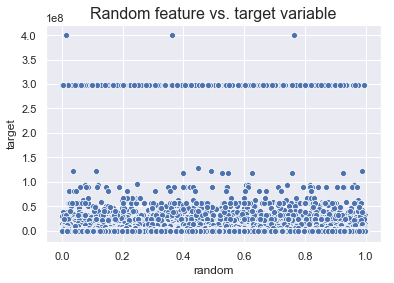

In [32]:
sns.scatterplot(x = 'random', y = 'target', data = X.assign(target = y)).set_title('Random feature vs. target variable', fontsize = 16)

Text(0.5, 1.0, 'Correlation matrix')

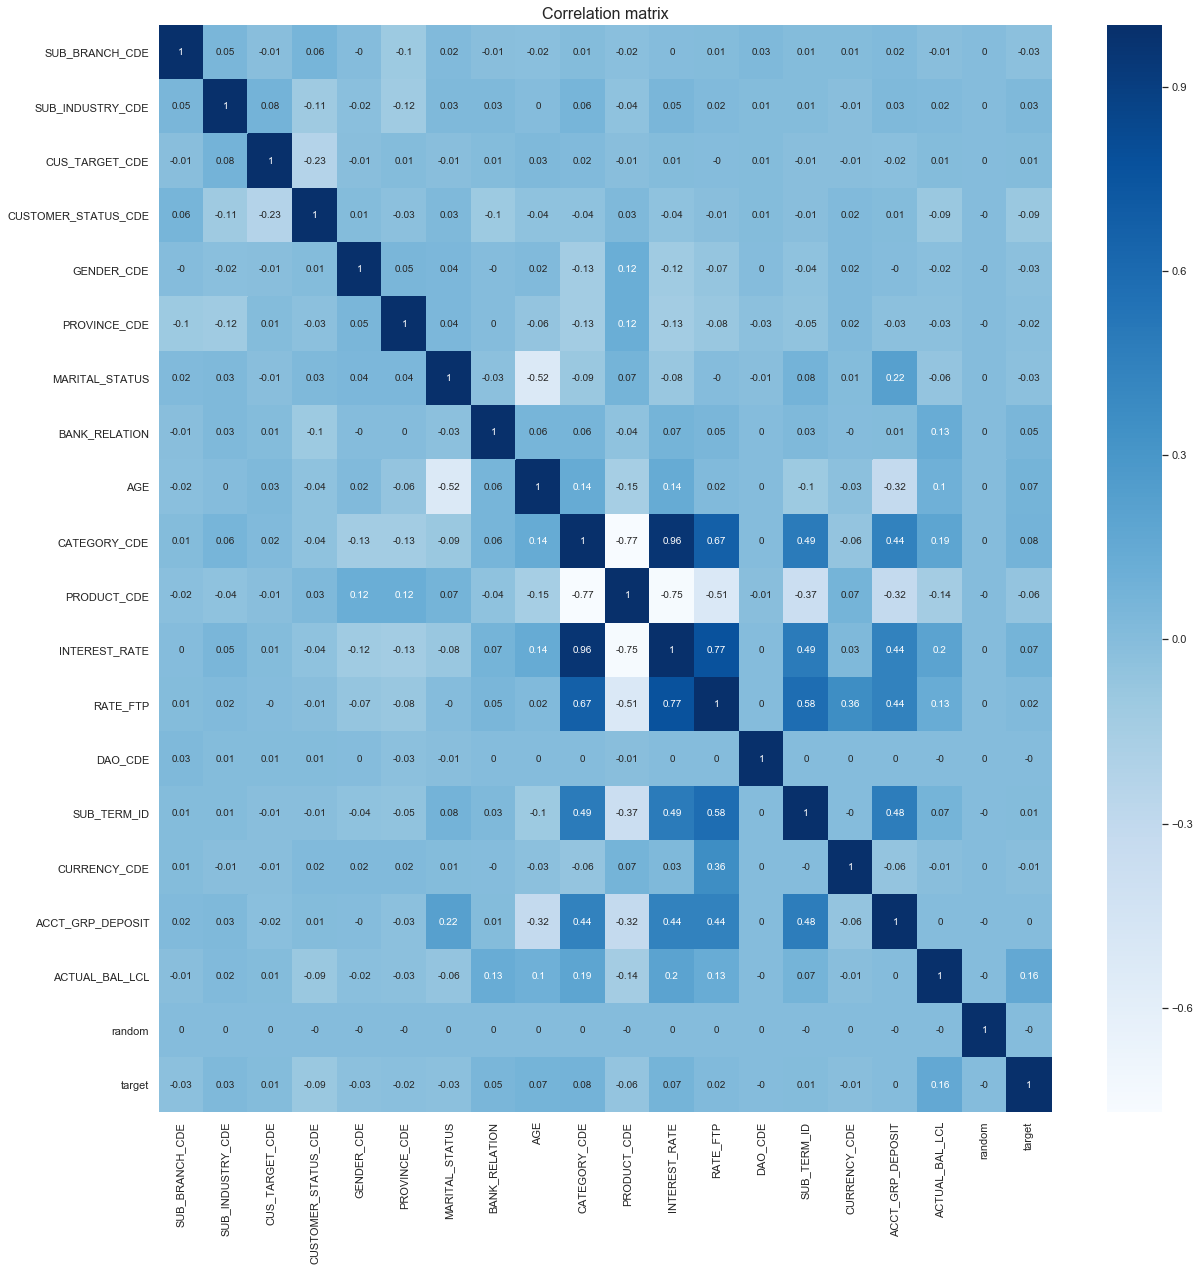

In [33]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(X.assign(target = y).corr().round(2), cmap = 'Blues', annot = True,ax=ax).set_title('Correlation matrix', fontsize = 16)

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [37]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                    rf.oob_score_,
                                                                                    rf.score(X_valid, y_valid)))

R^2 Training Score: 1.00 
OOB Score: 0.98 
R^2 Validation Score: 0.97


In [38]:
base_imp = imp_df(X_train_org.columns, rf.feature_importances_)
base_imp

,feature,feature_importance
0,AGE,0.358517
1,SUB_BRANCH_CDE,0.334246
2,CUSTOMER_STATUS_CDE,0.259269
3,BANK_RELATION,0.014756
4,ACTUAL_BAL_LCL,0.009164
5,DAO_CDE,0.006916
6,CUS_TARGET_CDE,0.003314
7,INTEREST_RATE,0.002916
8,random,0.001963
9,SUB_INDUSTRY_CDE,0.001952


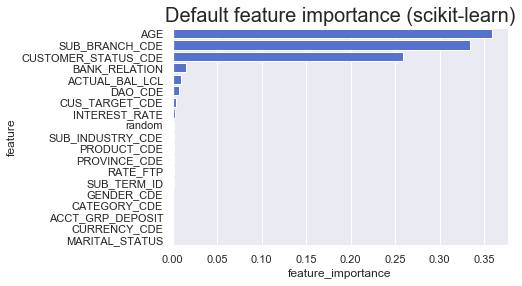

In [39]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

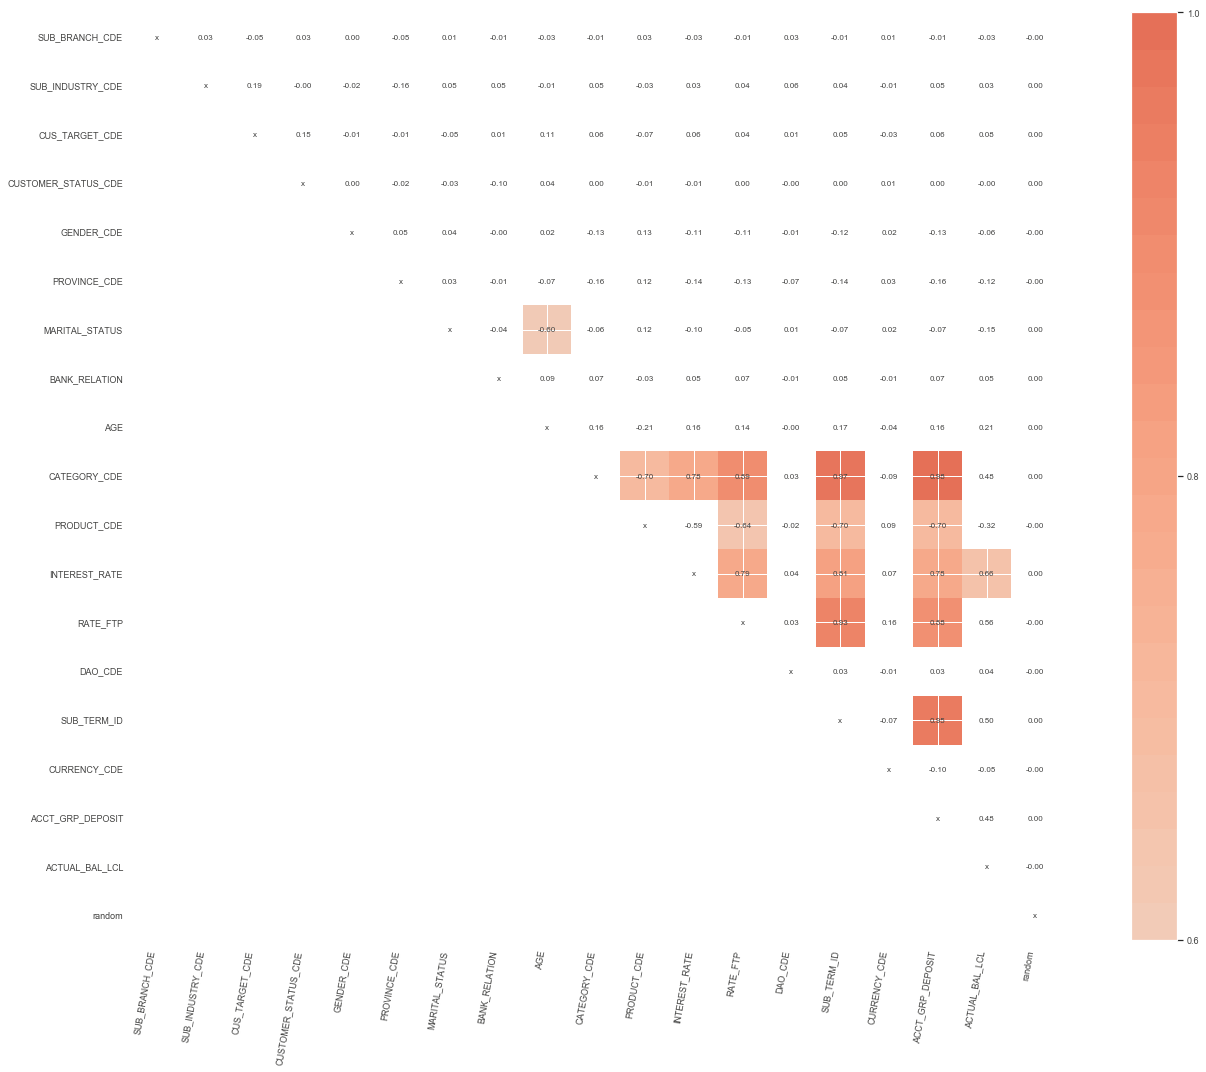

In [74]:
# from rfpimp import plot_corr_heatmap
# viz = plot_corr_heatmap(X_train_org, figsize=(25,15))
# viz.view()

In [78]:
# X_train_org['CATEGORY_CDE'].value_counts().plot(kind='bar')
# plt.title('CATEGORY_CDE')
# plt.xlabel('CATEGORY_CDE')
# plt.ylabel('INTEREST_RATE')
# plt.rcParams['figure.figsize']= [80,48]
# sns.despine

In [79]:
# plt.rcParams['figure.figsize']= [20,12]
# plt.scatter(X_train_org.CATEGORY_CDE,X_train_org.INTEREST_RATE)
# plt.title("INTEREST_RATE and CATEGORY_CDE ")
# plt.xlabel("CATEGORY_CDE")
# plt.ylabel("INTEREST_RATE")
# plt.show()
# sns.despine

In [80]:
# plt.figure(figsize=(10,10))
# sns.jointplot(x=X_train_org.CATEGORY_CDE.values, y=X_train_org.INTEREST_RATE.values, size=10)
# plt.ylabel('INTEREST_RATE', fontsize=12)
# plt.xlabel('CATEGORY_CDE', fontsize=12)
# plt.show()
# sns.despine

In [40]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

#phongtn - convert numpy array to dataframe
df_y_train = pd.DataFrame(data=y_train.flatten())

perm_imp_rfpimp = permutation_importances(rf, X_train_org, df_y_train, r2)
perm_imp_rfpimp.reset_index(drop = False, inplace = True)

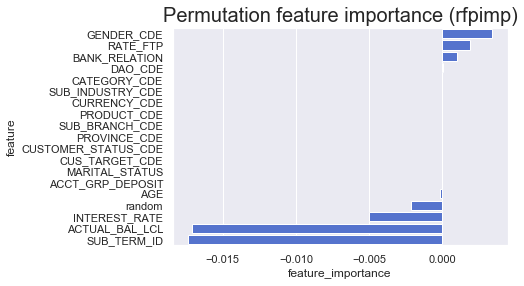

In [41]:
var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (rfpimp)')

In [44]:
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train_org.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        
        abc_org = X.drop(col, axis = 1)
        abc = X_train_org.drop(col, axis = 1)
        scalerAbc = StandardScaler().fit(abc_org)
        abc_train = scalerAbc.transform(abc)
        
        model_clone.fit(abc_train, y_train)
        drop_col_score = model_clone.score(X_train_org.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train_org.columns, importances)
    return importances_df

In [45]:
drop_imp = drop_col_feat_imp(rf, X_train, y_train)
var_imp_plot(drop_imp, 'Drop Column feature importance')

C:\Users\hoang\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
C:\Users\hoang\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
C:\Users\hoang\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by 

KeyboardInterrupt: 

In [35]:
pred_diff = pd.DataFrame({'difference': abs(y_train - rf.predict(X_train))})

print('Index with smallest error:', pred_diff.sort_values('difference').head(1).index.values[0])
print('Index with largest error:', pred_diff.sort_values('difference', ascending = False).head(1).index.values[0])

Index with smallest error: 41602
Index with largest error: 5524


In [37]:
from treeinterpreter import treeinterpreter as ti, utils

selected_rows = [31, 85]
selected_df = X_train.iloc[selected_rows,:].values
prediction, bias, contributions = ti.predict(rf, selected_df)

In [38]:
for i in range(len(selected_rows)):
    print("Row", selected_rows[i])
    print("Prediction:", prediction[i][0], 'Actual Value:', y_train[selected_rows[i]])
    print("Bias (trainset mean)", bias[i])
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], 
                                 X_train.columns), 
                             key=lambda x: -abs(x[0])):
        print(feature, round(c, 2))
    print("-"*20) 

Row 31
Prediction: 12845.341597500015 Actual Value: 291.27083
Bias (trainset mean) 154394.95987992221
Feature contributions:
ACTUAL_BAL_LCL -88034.31
BANK_RELATION -37353.14
SUB_TERM_ID -14560.33
CUSTOMER_STATUS_CDE -5566.13
SUB_BRANCH_CDE 3637.25
AGE 3151.54
random 3082.85
PRODUCT_CDE -2860.05
PROVINCE_CDE 1985.17
GENDER_CDE 1562.97
CATEGORY_CDE -1285.3
INTEREST_RATE -1178.06
CUS_TARGET_CDE -1015.58
ACCT_GRP_DEPOSIT -975.74
DAO_CDE -951.99
SUB_INDUSTRY_CDE -907.6
MARITAL_STATUS -274.8
RATE_FTP -6.36
CURRENCY_CDE 0.0
--------------------
Row 85
Prediction: 4313.097112879998 Actual Value: 0.0
Bias (trainset mean) 154394.95987992221
Feature contributions:
ACTUAL_BAL_LCL -65567.21
BANK_RELATION -37725.46
SUB_TERM_ID -14560.33
SUB_BRANCH_CDE -10719.79
random -6670.83
INTEREST_RATE 5188.01
PROVINCE_CDE -4988.13
CUSTOMER_STATUS_CDE -4491.95
PRODUCT_CDE -3404.96
CUS_TARGET_CDE -2331.33
DAO_CDE -2145.31
MARITAL_STATUS 1603.79
CATEGORY_CDE -1300.32
ACCT_GRP_DEPOSIT -1277.21
GENDER_CDE -992.74
S

In [39]:
prediction1, bias1, contributions1 = ti.predict(rf, np.array([selected_df[0]]), joint_contribution=True)
prediction2, bias2, contributions2 = ti.predict(rf, np.array([selected_df[1]]), joint_contribution=True)

In [40]:
aggregated_contributions1 = utils.aggregated_contribution(contributions1)
aggregated_contributions2 = utils.aggregated_contribution(contributions2)

In [41]:
res = []
for k in set(aggregated_contributions1.keys()).union(
              set(aggregated_contributions2.keys())):
    res.append(([X_train.columns[index] for index in k] , 
               aggregated_contributions1.get(k, 0) - aggregated_contributions2.get(k, 0)))   
         
for lst, v in (sorted(res, key=lambda x:-abs(x[1])))[:10]:
    print (lst, v)

['ACTUAL_BAL_LCL', 'CUSTOMER_STATUS_CDE', 'BANK_RELATION'] [-9085.20178914]
['SUB_TERM_ID', 'ACTUAL_BAL_LCL', 'CUSTOMER_STATUS_CDE', 'BANK_RELATION'] [-6121.32918012]
['PRODUCT_CDE', 'DAO_CDE', 'ACTUAL_BAL_LCL', 'CUS_TARGET_CDE', 'CUSTOMER_STATUS_CDE', 'PROVINCE_CDE', 'BANK_RELATION', 'AGE', 'random'] [3747.10334976]
['SUB_BRANCH_CDE', 'PRODUCT_CDE', 'DAO_CDE', 'ACTUAL_BAL_LCL', 'SUB_INDUSTRY_CDE', 'CUS_TARGET_CDE', 'CUSTOMER_STATUS_CDE', 'PROVINCE_CDE', 'BANK_RELATION', 'AGE', 'random'] [2242.89781539]
['SUB_BRANCH_CDE', 'PRODUCT_CDE', 'INTEREST_RATE', 'DAO_CDE', 'SUB_TERM_ID', 'ACCT_GRP_DEPOSIT', 'ACTUAL_BAL_LCL', 'SUB_INDUSTRY_CDE', 'CUSTOMER_STATUS_CDE', 'GENDER_CDE', 'PROVINCE_CDE', 'MARITAL_STATUS', 'BANK_RELATION', 'AGE'] [1679.50288254]
['SUB_BRANCH_CDE', 'PRODUCT_CDE', 'DAO_CDE', 'ACTUAL_BAL_LCL', 'SUB_INDUSTRY_CDE', 'CUSTOMER_STATUS_CDE', 'GENDER_CDE', 'PROVINCE_CDE', 'BANK_RELATION', 'AGE', 'random'] [1631.47423874]
['INTEREST_RATE', 'SUB_TERM_ID', 'ACTUAL_BAL_LCL', 'SUB_IND

In [42]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   mode = 'regression',
                                                   feature_names = X_train.columns,
                                                   categorical_features=[3], 
                                                   categorical_names=['CHAS'], 
                                                   discretize_continuous = True)

In [43]:
np.random.seed(42)
exp = explainer.explain_instance(X_train.values[31], rf.predict, num_features=5)
exp.show_in_notebook(show_all=False) #only the features used in the explanation are displayed

np.random.seed(42)
exp = explainer.explain_instance(X_train.values[85], rf.predict, num_features=5)
exp.show_in_notebook(show_all=False)

In [ ]:
# import eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(X_train, y_train)
# perm_imp_eli5 = imp_df(X_train.columns, perm.feature_importances_)
# var_imp_plot(perm_imp_eli5, 'Permutation feature importance (eli5)')
# eli5.show_weights(perm)